In [42]:
import string
import operator
from graphviz import Digraph
from rcviz import CallGraph, viz

# Binary Tree with lists

In [1]:
def binary_tree(r):
    return [r, [], []]

In [2]:
def insert_left(root, new_branch):
    t = root.pop(1)
    
    if len(t) > 1:
        root.insert(1, [new_branch, t, []])
    else:
        root.insert(1, [new_branch, [], []])
        
    return root

In [3]:
def insert_right(root, new_branch):
    t = root.pop(2)
    
    if len(t) > 1:
        root.insert(2, [new_branch, [], t])
    else:
        root.insert(2, [new_branch, [], []])
        
    return root

In [4]:
def get_root_val(root):
    return root[0]

def set_root_val(root, new_val):
    root[0] = new_val
    
def get_left_child(root):
    return root[1]

def get_right_child(root):
    return root[2]

### Testing

In [5]:
r = binary_tree(3)

In [6]:
r

[3, [], []]

In [7]:
insert_left(r, 4)

[3, [4, [], []], []]

In [28]:
insert_right(r, 6)

[3,
 [9, [12, [], []], []],
 [6,
  [],
  [6,
   [],
   [6,
    [],
    [6,
     [],
     [6,
      [],
      [6, [], [6, [], [6, [], [6, [], [6, [], [6, [], [6, [], []]]]]]]]]]]]]]

In [9]:
l = get_left_child(r)

In [10]:
l

[4, [], []]

In [11]:
set_root_val(l, 9)

In [12]:
l

[9, [], []]

In [13]:
r

[3, [9, [], []], [6, [], []]]

In [14]:
insert_left(l, 12)

[9, [12, [], []], []]

In [16]:
r

[3, [9, [12, [], []], []], [6, [], []]]

In [17]:
l

[9, [12, [], []], []]

# Binary Tree with classes

### (An object-oriented approach)

In [29]:
class BinaryTree:
    def __init__(self, key):
        self.key = key
        self.left_child = None
        self.right_child = None
        
    def insert_left(self, key):
        if self.left_child is None:
            self.left_child = BinaryTree(key)
        else:  # if there IS a left child
            t = BinaryTree(key)
            t.left_child = self.left_child
            self.left_child = t
            
    def insert_right(self, key):
        if self.right_child is None:
            self.right_child = BinaryTree(key)
        else:  # if there IS a right child
            t = BinaryTree(key)
            t.right_child = self.right_child
            self.right_child = t
            
    def get_right_child(self):
        return self.right_child
    
    def get_left_child(self):
        return self.left_child
    
    def get_root_val(self):
        return self.key
    
    def set_root_val(self, new_key):
        self.key = new_key
    
    def __repr__(self):
        return f"BinaryTree({self.key!r})"

### Testing

In [30]:
r = BinaryTree("a")

In [31]:
r

BinaryTree('a')

In [37]:
print("root value:", repr(r.get_root_val()))
print("left child:", r.get_left_child())
print("right child:", r.get_right_child())

root value: 'a'
left child: BinaryTree('b')
right child: BinaryTree('c')


In [33]:
r.insert_left('b')
print("left child:", r.get_left_child())

left child: BinaryTree('b')


In [46]:
r.insert_right('e')
print("right child:", r.get_right_child())

right child: BinaryTree('e')


In [35]:
r

BinaryTree('a')

In [36]:
r.get_right_child()

BinaryTree('c')

# A tool for visualizing trees

In [48]:
def viz_tree(r):
    stack = Stack()
    g = Digraph(node_attr={'shape': 'record', 'height': '.1'})
    _id = 0
    current_node = r
    leftward = True
    current_root_num = 0
    
    while True:
        if current_node:
            stack.push((_id, current_node))

            #g.node(f'node{_id}', 
            #       f'<f0>|<f1> {current_node.key}:{current_node.payload} ({current_node.balance_factor})|<f2> ')
             
            g.node(f'node{_id}', 
                   f'<f0>|<f1> {current_node.key}|<f2> ')

        
            if _id >= 1:
                g.edge(f'node{current_root_num}:f{0 if leftward else 2}',
                       f'node{_id}:f1')
                
            leftward = True
            current_node = current_node.left_child  # left
            current_root_num = _id
            _id += 1

        if current_node is None and not stack.is_empty():
            count, popped_node = stack.pop()
            if popped_node.right_child:
                current_root_num = count
                current_node = popped_node.right_child  # right
                leftward = False
            
        if current_node is None and stack.is_empty():
            break      

    return g

In [51]:
node_e = r.get_right_child()

In [52]:
node_e.insert_left('left')

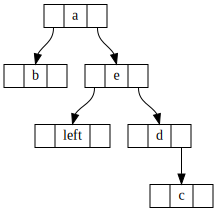

In [53]:
viz_tree(r)

# Now let's use a tree for parsing expressions

### We need a stack

In [54]:
class Stack:
    def __init__(self):
         self.items = []

    def is_empty(self):
         return self.items == []

    def push(self, item):
        self.items.append(item)

    def pop(self):
         return self.items.pop()

    def peek(self):
         return self.items[-1]

    def size(self):
         return len(self.items)

### Build a parse tree

In [57]:
def build_parse_tree(fpexp):
    fplist = fpexp.split()
    p_stack = Stack()
    e_tree = BinaryTree('')
    
    p_stack.push(e_tree)
    current_tree = e_tree
    
    for i in fplist:
        if i == "(":
            # create our left child, and descend to it
            current_tree.insert_left('')
            p_stack.push(current_tree)
            current_tree = current_tree.get_left_child()
        elif i.isdigit():
            current_tree.set_root_val(int(i))
            parent = p_stack.pop()
            current_tree = parent
        elif i in ["+", "-", "/", "*"]:
            current_tree.set_root_val(i)
            current_tree.insert_right('')
            p_stack.push(current_tree)
            current_tree = current_tree.get_right_child()
        elif i == ")":
            current_tree = p_stack.pop()
        else:
            raise ValueError("invalid expression given!")
            
    return e_tree

In [84]:
t = build_parse_tree("( ( 1 + 1 ) * 5 )")

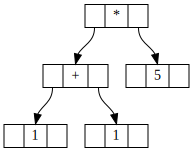

In [85]:
viz_tree(t)

In [76]:
evaluate(t)

10

In [72]:
cg = CallGraph()
@viz(cg)
def evaluate(parse_tree):
    opers = {
        "+": operator.add,
        "-": operator.sub,
        "*": operator.mul,
        "/": operator.truediv
    }
    
    left_c = parse_tree.get_left_child()
    right_c = parse_tree.get_right_child()
    
    if left_c and right_c:
        # recursion on expression
        fn = opers[parse_tree.get_root_val()]
        return fn(evaluate(left_c), evaluate(right_c))
    else:
        # base case
        return parse_tree.get_root_val()

In [ ]:
def evaluate_post(tree):
    opers = {
        "+": operator.add,
        "-": operater.sub,
        "*": operator.mul,
        "/": operator.truediv
    }
    
    res1 = None
    res2 = None
    
    if tree:
        res1 = evaluate_post(tree.get_left_child())
        res2 = evaluate_post(tree.get_right_child())
        if res1 and res2:
            fn = opers[tree.get_root_val()]
            return fn(res1, res2)
        else:
            return tree.get_root_val()

In [77]:
def preorder(tree):
    if tree:
        print(tree.get_root_val(), end=" ")
        preorder(tree.get_left_child())
        preorder(tree.get_right_child())

In [78]:
preorder(t)

* + 1 1 5 

In [79]:
def postorder(tree):
    if tree:
        postorder(tree.get_left_child())
        postorder(tree.get_right_child())
        print(tree.get_root_val(), end=" ")

In [80]:
postorder(t)

1 1 + 5 * 

In [82]:
def inorder(tree):
    if tree:
        inorder(tree.get_left_child())
        print(tree.get_root_val(), end=" ")
        inorder(tree.get_right_child())

In [83]:
inorder(t)

1 + 1 * 5 

In [86]:
def printexp(tree):
    s_val = ""
    if tree:
        s_val = "(" + printexp(tree.get_left_child())
        s_val += str(tree.get_root_val())
        s_val += printexp(tree.get_right_child()) + ")"
        
    return s_val

In [87]:
printexp(t)

'(((1)+(1))*(5))'

## Testing our Expression Functions

In [ ]:
pt = build_parse_tree("( ( 10 + 5 ) * 3 )")

In [ ]:
viz_tree(pt)

In [ ]:
inorder(pt)

In [ ]:
preorder(pt)

In [ ]:
postorder(pt)

In [ ]:
printexp(pt)

## Updating `BinaryTree` class to include traversal methods

In [ ]:
class BinaryTree:
    def __init__(self, key):
        self.key = key
        self.left_child = None
        self.right_child = None
        
    def insert_left(self, key):
        if self.left_child is None:
            self.left_child = BinaryTree(key)
        else:  # if there IS a left child
            t = BinaryTree(key)
            t.left_child = self.left_child
            self.left_child = t
            
    def insert_right(self, key):
        if self.right_child is None:
            self.right_child = BinaryTree(key)
        else:  # if there IS a right child
            t = BinaryTree(key)
            t.right_child = self.right_child
            self.right_child = t
            
    def get_right_child(self):
        return self.right_child
    
    def get_left_child(self):
        return self.left_child
    
    def get_root_val(self):
        return self.key
    
    def set_root_val(self, new_key):
        self.key = new_key
    
    def preorder(self):
        print(self.key)
        
        if self.left_child:
            self.left_child.preorder()
        
        if self.right_child:
            self.right_child.preorder()

    def inorder(self):
        if self.left_child:
            self.left_child.inorder()
            
        print(self.key)

        if self.right_child:
            self.right_child.inorder()
 
    def postorder(self):
        if self.left_child:
            self.left_child.postorder()

        if self.right_child:
            self.right_child.postorder()

        print(self.key)
    
    def __repr__(self):
        return f"BinaryTree({self.key!r})"

## After updating it, test again

In [ ]:
pt

In [ ]:
pt.preorder()

In [ ]:
pt.inorder()

In [ ]:
pt.postorder()